
Analyzed 43176 files



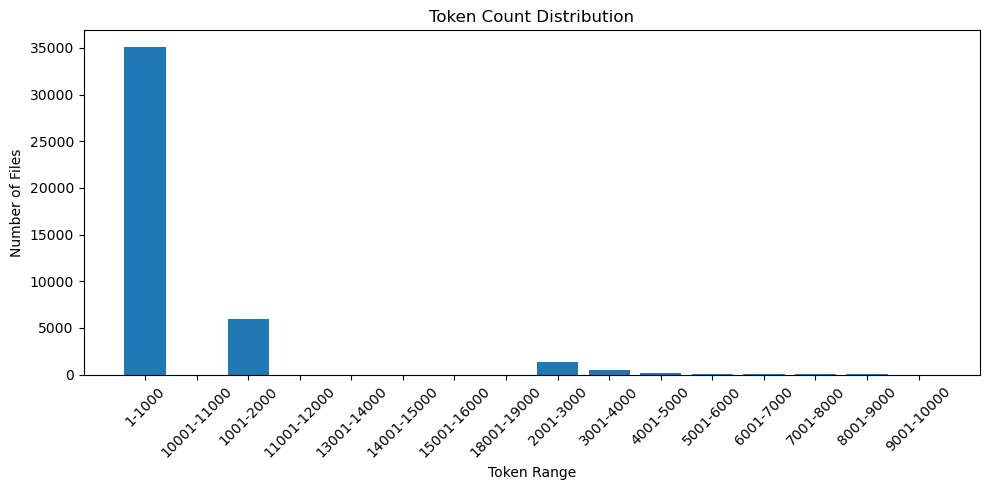

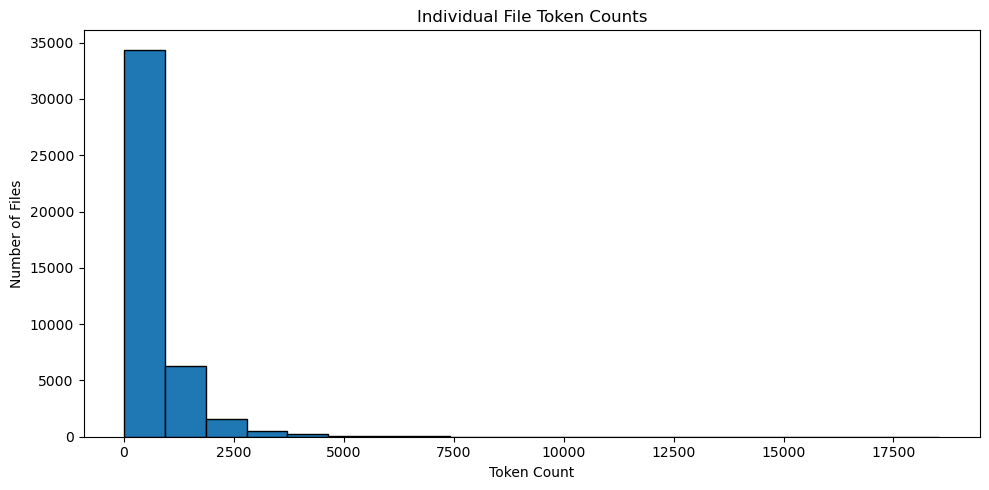


Token Count Distribution:
1-1000 tokens: 35127 files
10001-11000 tokens: 6 files
1001-2000 tokens: 5948 files
11001-12000 tokens: 4 files
13001-14000 tokens: 2 files
14001-15000 tokens: 1 files
15001-16000 tokens: 2 files
18001-19000 tokens: 3 files
2001-3000 tokens: 1335 files
3001-4000 tokens: 444 files
4001-5000 tokens: 168 files
5001-6000 tokens: 50 files
6001-7000 tokens: 50 files
7001-8000 tokens: 16 files
8001-9000 tokens: 15 files
9001-10000 tokens: 5 files

Individual File Token Counts:
..\..\..\temp\adaptive-learning\training\modules\intro-machine-learning-keras\6-summary\a50663e8-3ade-f4c2-f397-105177f2996e: 9 tokens
..\..\..\temp\adaptive-learning\training\modules\intro-machine-learning-tensorflow\8-summary\bc5b90ed-7f63-9edf-4dc4-6d6cf9651464: 9 tokens
..\..\..\temp\adaptive-learning\training\modules\intro-audio-classification-tensorflow\4-speech-model\555d4d1f-7498-41c4-597c-7ec47ae072ab: 11 tokens
..\..\..\temp\adaptive-learning\training\modules\intro-machine-learning-t

In [14]:
import json
from pathlib import Path
import tiktoken
from collections import Counter

# Initialize GPT-4 tokenizer
encoding = tiktoken.encoding_for_model('text-embedding-3-large')

def count_tokens(text):
    return len(encoding.encode(text))

def get_token_bucket(token_count):
    return f"{(token_count - 1) // 1000 * 1000 + 1}-{(token_count - 1) // 1000 * 1000 + 1000}"

def analyze_folder(folder_path):
    token_counts = Counter()
    file_token_counts = []
    total_files = 0
    
    for file_path in Path(folder_path).rglob('*'):
        if file_path.is_file():
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    if 'content' in data:
                        token_count = count_tokens(data['content'])
                        bucket = get_token_bucket(token_count)
                        token_counts[bucket] += 1
                        file_token_counts.append((str(file_path), token_count))
                        total_files += 1
            except (json.JSONDecodeError, UnicodeDecodeError) as e:
                continue
    
    # Sort files by token count
    file_token_counts.sort(key=lambda x: x[1])
    
    print(f"\nAnalyzed {total_files} files\n")
    
    # Visualization imports
    import matplotlib.pyplot as plt
    
    # Token distribution bar chart
    plt.figure(figsize=(10, 5))
    buckets = sorted(token_counts.keys())
    counts = [token_counts[b] for b in buckets]
    plt.bar(buckets, counts)
    plt.title('Token Count Distribution')
    plt.xlabel('Token Range')
    plt.ylabel('Number of Files')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Individual token counts histogram
    plt.figure(figsize=(10, 5))
    token_values = [count for _, count in file_token_counts]
    plt.hist(token_values, bins=20, edgecolor='black')
    plt.title('Individual File Token Counts')
    plt.xlabel('Token Count')
    plt.ylabel('Number of Files')
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nToken Count Distribution:")
    for bucket, count in sorted(token_counts.items()):
        print(f"{bucket} tokens: {count} files")
    
    print("\nIndividual File Token Counts:")
    for file_path, count in file_token_counts:
        print(f"{file_path}: {count} tokens")

# Analyze the adaptive-learning folder
analyze_folder('../../../temp/adaptive-learning/')